<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score,
    log_loss
)
import warnings

# Disable warnings
warnings.filterwarnings("ignore")


In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:

url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/diabetes.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape


(768, 9)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [9]:
X.shape, y.shape


((768, 8), (768,))

In [10]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(9)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [11]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
69,4,146,85,27,100,28.9,0.189,27
85,2,110,74,29,125,32.4,0.698,27
219,5,112,66,0,0,37.8,0.261,41
712,10,129,62,36,0,41.2,0.441,38


In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Print the shape of the scaled training data
print("X_train_scaled shape:", X_train_scaled.shape)
scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_train_scaled.shape

X_train_scaled shape: (614, 8)


(614, 8)

In [37]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)


LogisticRegression()

In [38]:
model.coef_

array([[ 0.34793889,  1.1672818 , -0.20092548, -0.0538404 , -0.0883781 ,
         0.75212144,  0.42169378,  0.24350804]])

In [39]:
model.score(X_train_scaled, y_train)



0.7915309446254072

In [40]:
X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 15],
       [26, 27]])

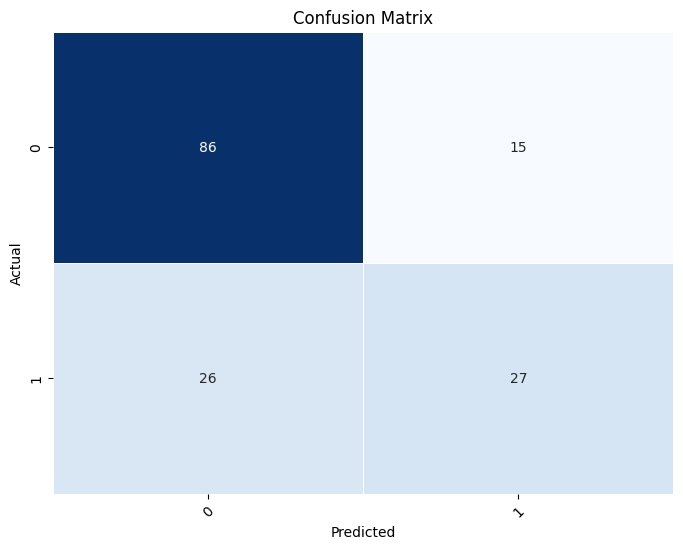

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (if not provided by the model)
class_labels = model.classes_

# Create a pandas DataFrame for the confusion matrix
confusion_df = pd.DataFrame(cnf_matrix, index=class_labels, columns=class_labels)

# Create a more complex visualization using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.show()



In [46]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7337662337662337, 0.6428571428571429, 0.5094339622641509, 0.568421052631579)

In [47]:
probs = model.predict_proba(X_test_scaled)
precision, recall,  thersholds = precision_recall_curve(y_test, probs[:,1])

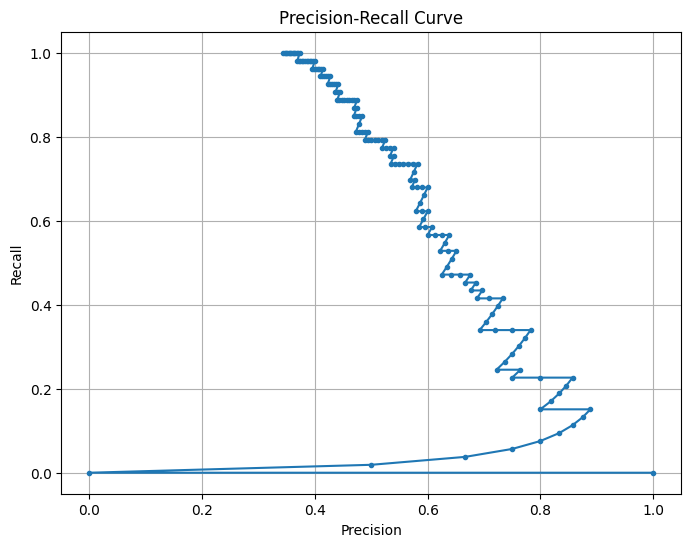

In [50]:
import matplotlib.pyplot as plt

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, marker='.')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()



In [51]:
y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

23.639019430524886

In [52]:
# Display the first 5 rows of the DataFrame
url_cancer = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/cancer.csv'
data = pd.read_csv(url_cancer)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
data.info()
data = data.drop(columns = ['id', 'Unnamed: 32'])
data['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(9)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [61]:
scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train) # standardization of dependent variables
X_train_scaled.shape


(455, 30)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
model.score(X_train_scaled, y_train)

0.9934065934065934

In [76]:
X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)


In [77]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [78]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [93]:

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.9736842105263158, 1.0, 0.9387755102040817, 0.968421052631579)

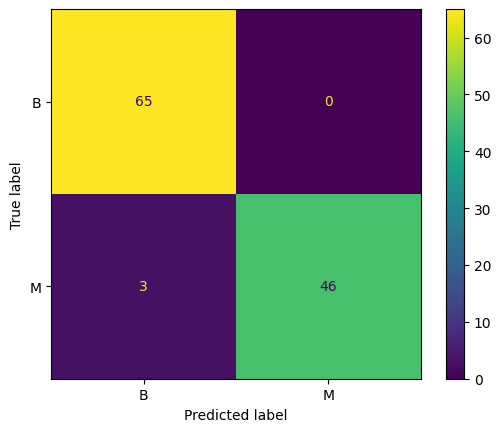

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['B', 'M']).plot(values_format='d')



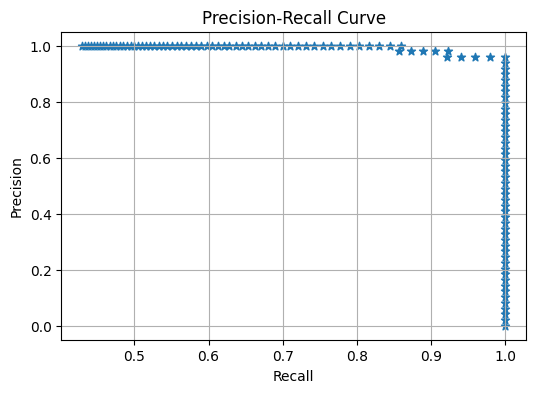

In [90]:
probs = model.predict_proba(X_test_scaled)
precision, recall,  thersholds = precision_recall_curve(y_test, probs[:,1])
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(precision, recall, marker='*')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.grid(True)
plt.show()


In [91]:
y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774

In [106]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [107]:
# Load the breast cancer dataset

url_cancer = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/cancer.csv'
data = pd.read_csv(url_cancer)
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
data.info()
data = data.drop(columns = ['id', 'Unnamed: 32'])
data['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(9)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [110]:
scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train) # standardization of dependent variables
X_train_scaled.shape

(455, 30)

In [112]:
from sklearn.linear_model import LogisticRegression
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [113]:
model.score(X_train_scaled, y_train)

0.9362637362637363

In [114]:
X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)


In [115]:
accuracy_score(y_test, y_pred)

0.9385964912280702

In [116]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [117]:

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9385964912280702,
 0.9565217391304348,
 0.8979591836734694,
 0.9263157894736843)

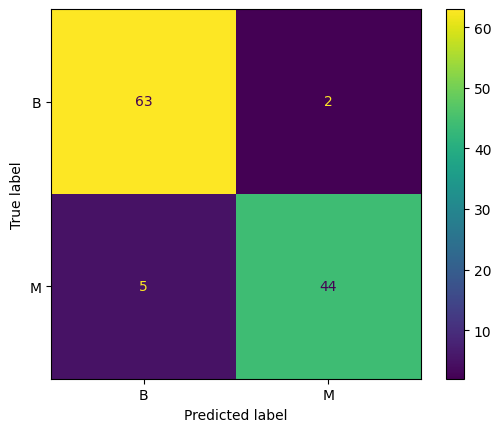

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['B', 'M']).plot(values_format='d')



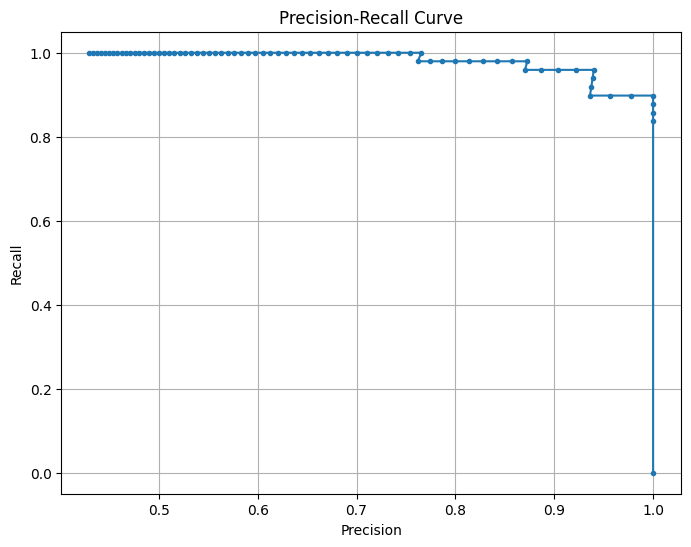

In [121]:
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, marker='.')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [122]:
y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774